In [54]:
import numpy as np
import random
import itertools
import math
import matplotlib.pyplot as plt

def get_cyclic_permutation(permutation):
    '''
    input: arbitary permutation of tokens in complete graph:list
    output: cyclic permutation equivalent of the input:list of lists
    '''
    pi=permutation
    cyclic_permutation=[]
    n=len(pi)
    not_in_cycle=list(range(n))
    while len(not_in_cycle)!=0:
        cycle=[]
        start=not_in_cycle[0]
        current=start
        cycle.append(start)
        not_in_cycle.remove(start)
        final=-1
        while final != start:
            current=permutation[current]
            cycle.append(current)
            if(current in not_in_cycle):
                not_in_cycle.remove(current)
            final=current
        cyclic_permutation.append(cycle)
    cyclic=[]
    for i in cyclic_permutation:
        length=len(i)
        if(length>2):
            cyclic.append(i[:-1])
    return(cyclic)
def Get_Routing_via_matching(cyclic_permutation):
    '''
    input:cyclic permutations: list of lists
    output: 2 step swaps that is equivalent to routing via matching 2 list of list(list of swaps)
    '''
    layer_1=[]
    layer_2=[]
    for cycle in  cyclic_permutation:
        length=len(cycle)
        for j in range(int(len(cycle)/2)):
            layer_1.append([cycle[j],cycle[length-j-1]])
            if(cycle[j+1]!=cycle[length-j-1]):
                layer_2.append([cycle[j+1],cycle[length-j-1]])
    return(layer_1,layer_2)

def old_causaly_cover_nodes(M,i,j):##edges=M
    '''
    input: M=random matching for the complete graph
           i=initial node n>=i,j>=0 int
           j=final node 
    output:boolean:true: iand j are causaly cover
                   false: i and j are not causaly covered
    '''
    path=[i]
    cover=False
    for matching in M: ##if you think about it M is nothing but random matching in our complete graph
        for i in matching:
            current=path[-1]
            if(i[0]==current):
                path.append(i[1])
                if(i[1]==j):
                    cover=True
                break
            elif(i[1]==current):
                path.append(i[0])
                if(i[0]==j):
                    cover=True
                break
        if(cover==True):
            # print("path for causaly cover=",path)
            return cover
    return cover
def causaly_cover_nodes(M,i,j):##edges=M
    '''
    input: M=random matching for the complete graph
           i=initial node n>=i,j>=0 int
           j=final node 
    output:boolean:true: iand j are causaly cover
                   false: i and j are not causaly covered
    '''
    covered_set=[i]
    cover=False
    for matching in M: ##if you think about it M is nothing but random matching in our complete graph
        for k in matching:
            new_covered=[]
            for l in covered_set:
                current=l
                if(k[0]==current):
                    new_covered.append(k[1])
                    if(k[1]==j):
                        cover=True
                        break
                elif(k[1]==current):
                    new_covered.append(k[0])
                    if(k[0]==j):
                        cover=True
                        break
            covered_set=covered_set+new_covered
            if(cover==True):
                # print("path for causaly cover=",path)
                return cover
    return cover

def causaly_cover_graph(M,n):
    nodes=list(range(n))
    ##get all the possible pair combination for nodes:
    permutation=list(itertools.permutations(nodes,2))
    for pairs in permutation:
        is_causaly_cover=causaly_cover_nodes(M,pairs[0],pairs[1])
        if(is_causaly_cover== False):
            return(False,pairs)
    return(True,(-1,-1))
def create_M(pi):
    ''' 
    input: random/ arbitary permutations
    output:return all the matching generated for this permutations using 2 step routing algorithm
    '''
    ##pass all these permutation to get two step routing 
    M=[]
    for i in range(len(pi)):
        cyclic_permutation=get_cyclic_permutation(pi[i])
        O,E=Get_Routing_via_matching(cyclic_permutation)
        M.append(O)
        M.append(E)
    return M
# permutation=random.sample(list(range(5)),5)
# print("permutation=",permutation)
# cyclic_permutation=get_cyclic_permutation(permutation)
# print("cyclic permutations=",cyclic_permutation)
# O,E=Get_Routing_via_matching(cyclic_permutation)
# print("two step routing",O,E)

permutation= [3, 4, 0, 2, 1]
cyclic permutations= [[0, 3, 2], [1, 4]]
two step routing [[0, 2], [1, 4]] [[3, 2]]


### trying to see how many random permutation is required to make a graph causally covered

In [71]:
random_permutation_needed=[]
nodes_trial=[3,5,9,17,65,129,257.300]
for n in nodes_trial: ## for different graphs of n nodes
    print(n)
    nodes=list(range(n))
    pi=[]
    for k in range(1,100): ## create k different permutations
        ##create K-different random permutations 
        pi.append(random.sample(nodes,n))
        M=create_M(pi)
        is_causaly_cover,pairs=causaly_cover_graph(M,n)
        print(is_causaly_cover)
        if(is_causaly_cover==True):
            random_permutation_needed.append(k)
            break
    if(is_causaly_cover==False):
        random_permutation_needed.append(-1)
print(random_permutation_needed)

# n=5
# k=1
# pi=[]
# nodes=list(range(n))
# #create K-different random permutations 
# for i in range(k):
#     pi.append(random.sample(nodes,n))
# print("permutation=",pi)
# M=create_M(pi)
# print("M=",M)
# is_causaly_cover,pairs=causaly_cover_graph(M,n)
# if(is_causaly_cover==False):
#     print("these pairs are not causaly covered=",pairs)
#     print("M",M)
# print("is coudaly cover=",is_causaly_cover)



3
False
True
5
False
False
True
9
False
False
False
True
17
False
False
False
False
True
65
False
False
False
False
False
True
129
False
False
False
False
False
True
257.3


TypeError: 'float' object cannot be interpreted as an integer

In [ ]:
# n=5
# pi=[]
# pi.append(random.sample(list(range(n)),n))
# M=[]
# current_M=create_M([pi[-1]]) # trying one at a time so that it takes less time
# M=M+current_M
# causaly_cover=False
# dynamic_table=[]
# for i in range(n):
#     row=[]
#     for j in range(n):
#         row.append([])
#     dynamic_table.append([])

# while causaly_cover==False:
#     for match in current_M:
#         for swaps in match:
#             dynamic_table[swaps[0]][swaps[1]]=True
        
            

# while causaly_cover==False:



[[[0, 2], [4, 3]], [[4, 2]]]


Text(0, 0.5, 'random permutation required')

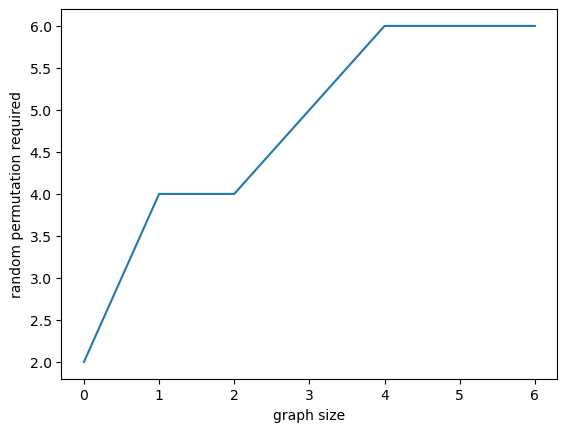

In [64]:
plt.plot(list(range(len(nodes_trial))),random_permutation_needed)

plt.xlabel("graph size")
plt.ylabel('random permutation required')

### Now use this method to create a WD distribution in quantum circuit. see if O(log(n)) depth is suffiecient for creating WD distribution or not. 